<a href="https://colab.research.google.com/github/ayushtripath17/SVM-parkinsons-diagnosis/blob/main/HOG_approach_Parkinsons_drawings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kmader/parkinsons-drawings

Dataset URL: https://www.kaggle.com/datasets/kmader/parkinsons-drawings
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 94% 39.0M/41.4M [00:02<00:00, 15.9MB/s]
100% 41.4M/41.4M [00:02<00:00, 14.6MB/s]


In [ ]:
! unzip parkinsons-drawings.zip

Archive:  parkinsons-drawings.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating: drawings

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import pandas as pd
import os
import cv2
import numpy as np
from skimage import feature
import random
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import color, io

In [ ]:
import random
from PIL import Image
from pathlib import Path

data_path = Path("drawings/")
image_path_list = list(data_path.glob("spiral/**/*.png"))
image_path = Path('drawings/spiral/training/parkinson/V05PE02.png')

# Extract the label
label = image_path.parent.stem

print("Label:", label)

Label: parkinson


In [ ]:
image_path_list

[PosixPath('drawings/spiral/testing/healthy/V05HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V01HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V04HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V55HE14.png'),
 PosixPath('drawings/spiral/testing/healthy/V55HE13.png'),
 PosixPath('drawings/spiral/testing/healthy/V10HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V03HE1.png'),
 PosixPath('drawings/spiral/testing/healthy/V55HE15.png'),
 PosixPath('drawings/spiral/testing/healthy/V08HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V55HE12.png'),
 PosixPath('drawings/spiral/testing/healthy/V11HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V09HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V07HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V02HE01.png'),
 PosixPath('drawings/spiral/testing/healthy/V06HE01.png'),
 PosixPath('drawings/spiral/testing/parkinson/V03PE01.png'),
 PosixPath('drawings/spiral/testing/parkinson/V14PE03.p

In [ ]:
class_dict = {
    "healthy": 0,
    "parkinson": 1
}

class_dict_2 = {
    0: "healthy",
    1: "parkinson"
}

In [ ]:
from skimage.transform import resize
import numpy as np
from skimage.io import imread
from skimage.feature import hog

desired_length = 52371
common_shape = (256, 256)  # Define the common shape for all images (adjust as needed)

data = []
images = []
labels = []
pa_count = 0
h_count = 0

for image_path in image_path_list:
    img = imread(image_path)

    # Resize the image to the common shape
    img_resized = resize(img, common_shape, anti_aliasing=True)

    fd, image = hog(img_resized, orientations=11, pixels_per_cell=(10, 10),
                    cells_per_block=(3, 3), visualize=True, multichannel=True)

    images.append(image)
    data.append(fd)
    label = image_path.parent.stem
    labels.append(class_dict[label])
    if label == "parkinson":
        pa_count += 1
    elif label == "healthy":
        h_count += 1

data = np.array(data)
images = np.array(images)
labels = np.array(labels)

print(f"Parkinsons: {pa_count} | Healthy: {h_count}")

<ipython-input-32-fc73288d499f>:21: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, image = hog(img_resized, orientations=11, pixels_per_cell=(10, 10),


Parkinsons: 51 | Healthy: 51


parkinson


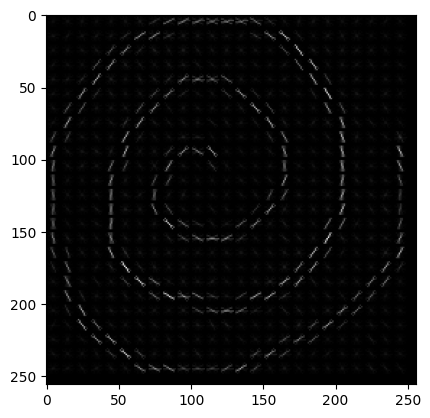

In [ ]:
import random
index = random.randint(0, 99)
print(class_dict_2[labels[index].item()])
plt.imshow(images[3], cmap="gray")

In [ ]:
data.shape

(102, 52371)

In [ ]:
labels =  labels.reshape(len(labels),1)
labels.shape

(102, 1)

In [ ]:
data_frame = np.hstack((data, labels))

np.random.seed(73) #71, 37, 35, 34, 78, 73
np.random.shuffle(data_frame)
data_frame

array([[0.11047943, 0.01401246, 0.07402264, ..., 0.09464106, 0.08373106,
        1.        ],
       [0.12850571, 0.0477272 , 0.01270641, ..., 0.08062279, 0.05275789,
        1.        ],
       [0.20003696, 0.07579903, 0.03276882, ..., 0.12440843, 0.05515343,
        0.        ],
       ...,
       [0.12152484, 0.04729471, 0.04103505, ..., 0.11079352, 0.11019843,
        0.        ],
       [0.1314362 , 0.08731   , 0.07083517, ..., 0.15814744, 0.06679437,
        1.        ],
       [0.14879675, 0.03534389, 0.06799072, ..., 0.08663461, 0.13499704,
        1.        ]])

In [ ]:
percentage = 80
partition = int(len(data)*percentage/100)

In [ ]:
pdc = svm.SVC()

# Assuming data_frame is a NumPy array and partition is the index where you want to split
X_train, X_test = data_frame[:partition, :-1], data_frame[partition:, :-1]
y_train, y_test = data_frame[:partition, -1], data_frame[partition:, -1]

# Assuming the last column contains labels and you want to use .ravel() to convert to 1D array
y_train, y_test = y_train.ravel(), y_test.ravel()

pdc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = pdc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

print("Accuracy: "+str(accuracy_score(y_test, y_pred))) #make confusion matrix
print('\n')
print(classification_report(y_test, y_pred)) # healthy is 0.0, parkinson's is 1.0

Accuracy: 0.8571428571428571


              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        12
         1.0       0.75      1.00      0.86         9

    accuracy                           0.86        21
   macro avg       0.88      0.88      0.86        21
weighted avg       0.89      0.86      0.86        21



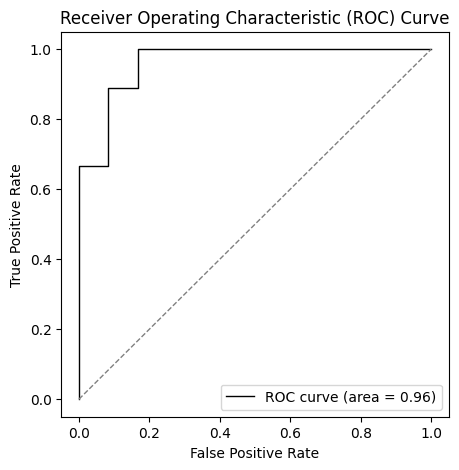

ROC AUC: 0.962962962962963


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming pdc is your SVM model and X_test is your test data
y_pred_proba = pdc.decision_function(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='black', lw=1, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('ROC AUC:', auc_score)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 0.5
y_pred_cm = pdc.predict(X_test)
y_pred_binary = (y_pred_cm > threshold).astype(int)

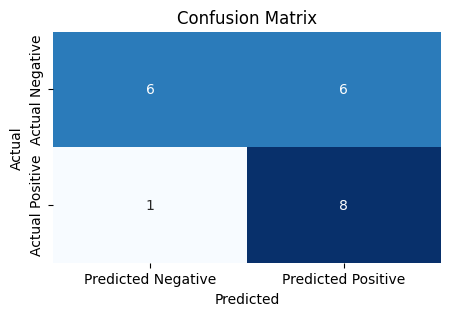

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted', fontname = 'Times New Roman')
plt.ylabel('Actual', fontname = 'Times New Roman')
plt.title('Confusion Matrix', fontname = 'Times New Roman')
plt.show()